This notebook is about identifying stroke and swing for tennis sports.

We are using [Myoarm band](https://www.myo.com/) a wearble device to be worn on your fore arm. This device has accelerometer, gyroscope and magnetometer. Along with that it also has eight EMG(Electic Myo graphy) which measues the activity of the muscle, using this it can identify type of gesture created by hand.

We will be using Accelerometer and Gyroscope data to identify the stroke and swing.
Typically acceleremeter data will help us find type of swing played(Topspin, Slice, Serve, Flat .etc) and gyroscope with help us to find fore hand and back hand stroke.

Currently we are only considereing right handed player for the data collection and modelling, but this model should also work for the left handed player but the output/prediction would be totally opposite(Like forehand will be considered as a backhand).

Importing important libraries

In [56]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from data_processing import *
from StrokeDetection import StrokeDetection

Loading data from files. IMG Data for forehand topspin, forehand slice, backhand topspin, backhand slice and Serves 

In [68]:
path = "./data/"
forehand_topspin = path + "train_forehand_set1.csv"
forehand_topspin = load_file(forehand_topspin, "forehand_topspin")
backhand_topspin = path + "train_backhand_topspin_set2.csv"
backhand_topspin = load_file(backhand_topspin, "backhand_topspin")
backhand_slice = path + "train_backhand_slice_set1.csv"
backhand_slice = load_file(backhand_slice, "backhand_slice")
forehand_slice = path + "train_forehand_slice_set1.csv"
forehand_slice = load_file(forehand_slice, "forehand_slice")


stroke_data = merge_data([forehand_topspin, backhand_topspin, backhand_slice, forehand_slice])
stroke_data.reset_index(drop=True)

#stroke_data = merge_data(forehand_topspin, backhand_topspin)
#stroke_data = merge_data(stroke_data, backhand_slice)
time, gyr, acc, quaternion  = get_lables(stroke_data)
stroke_y = get_y(stroke_data)

Given a stream of data from the Myo Device, 
our first goal is to identify the swing is happening or not.

To accomplish this, we came up with the folling algorithm:

1. Normalize the X,Y,Z of accelerometer ( this gives the total G force acting on the device)
2. Pass this Gforce to a butter filter
    1. Butter filter will reduce very high spikes of gforce and increase the low spikes of gforce.
    2. We are creating a tunnel to accept those values which are in between and leave those that are not useful
3. Now we have the filter data, we create a threshold value of 1G, anything above 1G is a swing.
4. We plot the graph to understand the working for the algowithm


In [72]:
quaternion[0]

KeyError: 0

This is helper fucntion which will help to plot different graph on runtime

This is about 3d geometery
# Why are we doing this?
We want to show the actual path of the swing in 3d to the player. Using VR Technologies we can play the swing,  using a dummy player and player can visualize the swing.

Quaretion plays a very important role in 3d geometry and it overcomes the problem of gimbla lock. 
Using gyroscope and accelerometer we can find the orientation of the device with quaternions. Myo API has 


We are identify swing from the data and plotting the first swing detected!

forehand_topspin


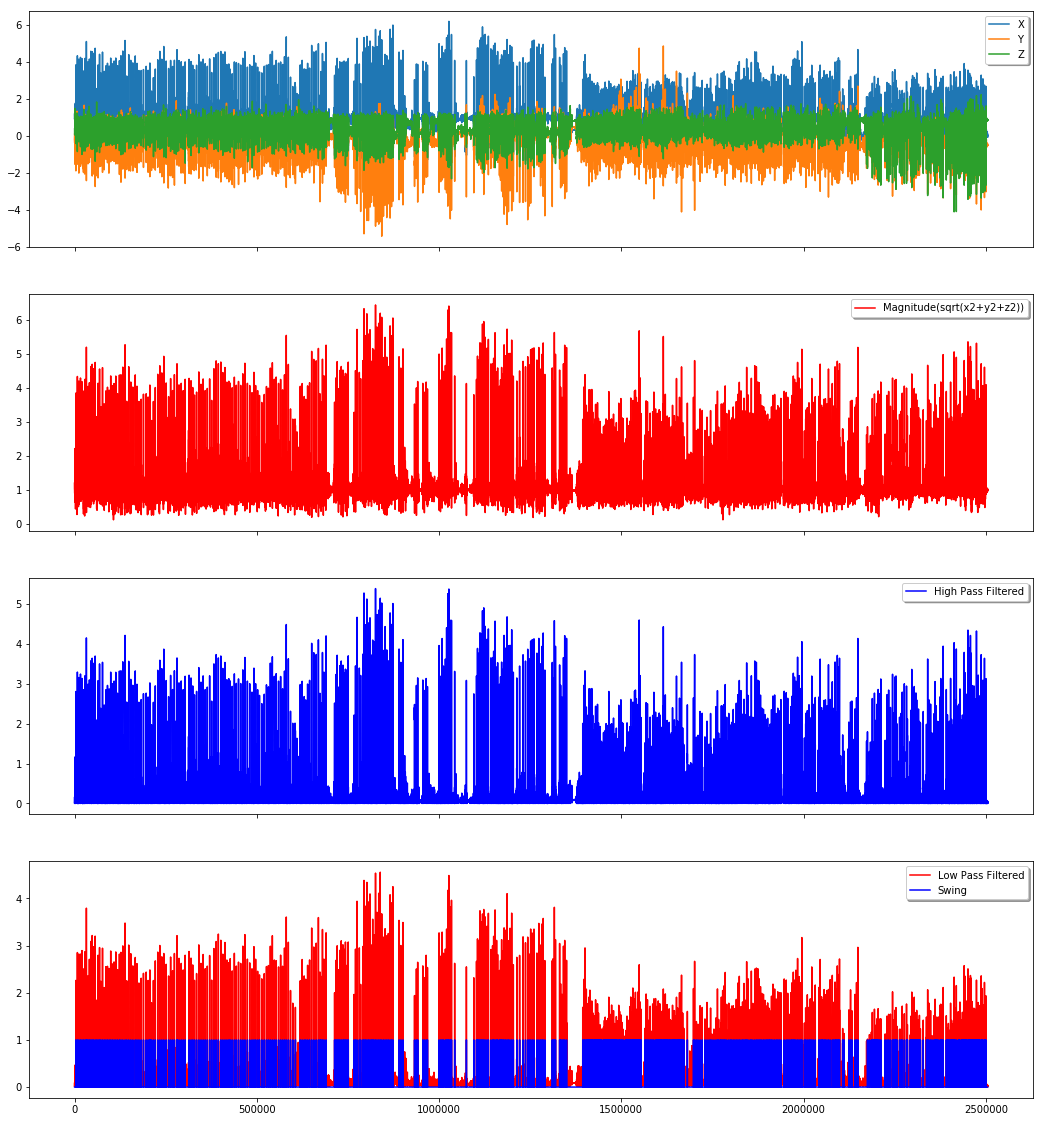

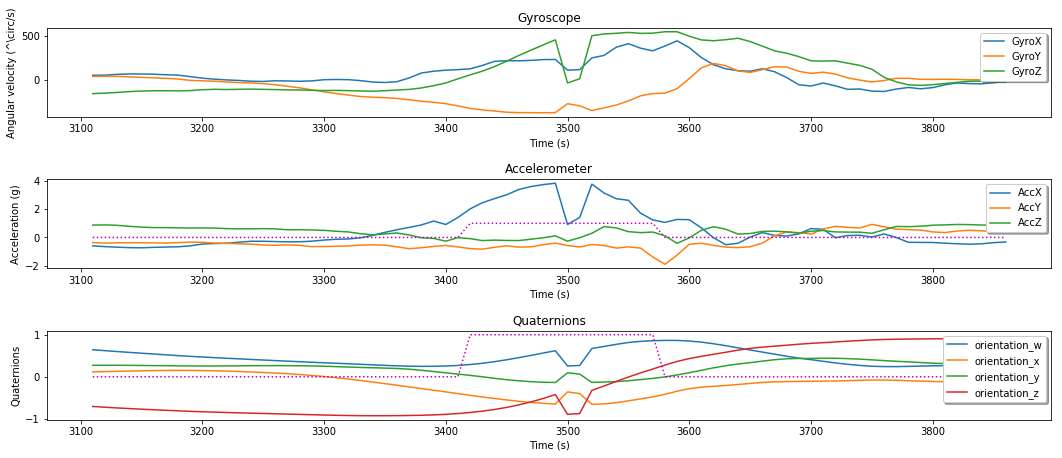

In [59]:
isSwing = StrokeDetection.identifyStroke(time, acc)
#time, accleration, threshold =1, hpCutOff=.001, \
#        lpCutOff=5.0, sampleFrequecy = 50, number_of_pass = 1, axis=1, plot=True
swingMidIndex, swingStartIndex, swingEndIndex, swingPresent = StrokeDetection.strokeIndexes(isSwing)
startPos = swingStartIndex[0] - 30
endPos = swingEndIndex[0] + 30

print (stroke_y[swingMidIndex[0]])
StrokeDetection.plotSwingData(time, gyr, acc, quaternion, swingPresent, startPos, endPos )

In [20]:
trans_acc, velocity, pos = StrokeDetection.derive_vel_to_pos(acc.copy(), quaternion.as_matrix(), 
                                                             swingEndIndex, swingStartIndex, swingPresent)

In [ ]:
#plot_findings("Racquet Velocity", time[startPos:endPos], 
#                      velocity_norm[startPos:endPos] * 3.6, "Time(ms)", 'Velocity (km/h)', ('X', 'Y', 'Z'))


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


fig = plt.figure()
print pos[6,0]
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos[300:400,0],pos[300:400,1],pos[300:400, 2])

plt.show()


sample_size = 2;
sample_index = np.random.randint(0, 133, size=sample_size)
f, axes = plt.subplots(sample_size*2,  figsize=(18,20))
f.subplots_adjust(hspace=.7)
i = 0;
for index in sample_index: 
    si = swingMidIndex[index]
    axes[i].plot()
    axes[i].plot(time[si-25:si+25],acc[si-25:si+25] )
    axes[i].set_title('Swing #  %d' % index);
    axes[i].set_xlabel('Time (s)');
    axes[i].set_ylabel('Angular velocity (^\circ/s)');
    axes[i].legend(['X', 'Y', 'Z'],shadow=True, fancybox=True, loc="upper right");
    axes[i+1].plot()
    axes[i+1].plot(time[si-25:si+25],gyr[si-25:si+25] )
    axes[i+1].set_title('Swing #  %d' % index);
    axes[i+1].set_xlabel('Time (s)');
    axes[i+1].set_ylabel('Angular velocity (^\circ/s)');
    axes[i+1].legend(['X', 'Y', 'Z'],shadow=True, fancybox=True, loc="upper right");
    i += 2
    
sample_index = np.random.randint(133, 220, size=sample_size)
f, axes = plt.subplots(sample_size*2,  figsize=(18,20))
f.subplots_adjust(hspace=.7)
i = 0;
for index in sample_index: 
    si = swingMidIndex[index]
    axes[i].plot()
    axes[i].plot(time[si-25:si+25],acc[si-25:si+25] )
    axes[i].set_title('Swing #  %d' % index);
    axes[i].set_xlabel('Time (s)');
    axes[i].set_ylabel('Angular velocity (^\circ/s)');
    axes[i].legend(['X', 'Y', 'Z'],shadow=True, fancybox=True, loc="upper right");
    axes[i+1].plot()
    axes[i+1].plot(time[si-25:si+25],gyr[si-25:si+25] )
    axes[i+1].set_title('Swing #  %d' % index);
    axes[i+1].set_xlabel('Time (s)');
    axes[i+1].set_ylabel('Angular velocity (^\circ/s)');
    axes[i+1].legend(['X', 'Y', 'Z'],shadow=True, fancybox=True, loc="upper right");
    i += 2
    
def noSwingDataAugmenation(swingMidIndex, Y_value, sample_size=4000):
    x_features, y_label = [], []
    for i in range(0, swingMidIndex.shape[0]-1):
        startIndex = swingMidIndex[i] + 70;
        endIndex = swingMidIndex[i+1] - 70;
        
        while(startIndex<endIndex and endIndex-startIndex > 50):
            a = acc.iloc[startIndex:startIndex + 50].as_matrix().T
            g = gyr.iloc[startIndex:startIndex + 50].as_matrix().T
            q = quaternion.iloc[startIndex:startIndex + 50].as_matrix().T
            y_label.append(Y_value)
            a = np.concatenate((a,g), axis=0)
            a = np.concatenate((a,q), axis=0)
            x_features.append(a)
            startIndex += 2;
            if(len(x_features) == sample_size):
                return np.array(x_features), np.array(y_label)
    
    return np.array(x_features), np.array(y_label)


In [78]:
#stroke_data[swingMidIndex].groupby("stroke").count()
stroke_y[swingMidIndex].value_counts()


backhand_slice      204
forehand_topspin    132
backhand_topspin    112
forehand_slice       99
Name: stroke, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(swingMidIndex, 
                                        stroke_y[swingMidIndex], test_size=0.3, 
                                        shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                    test_size=0.5, random_state=1)

print (X_train.shape, X_val.shape, X_test.shape)




((382,), (83,), (82,))


In [23]:
#swingDataSet_Y

#swing_targets = np_utils.to_categorical(swingDataSet_Y, 3)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
SwingClasses = ["backhand_slice", "backhand_topspin", "forehand_slice","forehand-topspin", ]
    
def hot_encoder(data):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(data)
    swing_targets = np_utils.to_categorical(integer_encoded, len(SwingClasses))
    return swing_targets
#swingDataSet_Y = onehot_encoder.fit_transform(integer_encoded)

#print swingDataSet_Y


In [24]:
def swingDataAugmenation(swingMidIndex):
    x_features, y_label = [], []
    
    # for each swing generate 50, 3 matrix by sliding 15 data points before and 15 data points after
    #this will give us 30 swings in total each swing. 
    for index in swingMidIndex:
        print index
        Y_value = stroke_y[index]
        if ((index + 40 ) > acc.shape[0]):
            break
        for i in range(10):
            a = acc[index-25-i:index+25-i].as_matrix().T
            g = gyr[index-25-i:index+25-i].as_matrix().T
            q = quaternion.iloc[index-25-i:index+25-i].as_matrix().T
            a = np.concatenate((a,g), axis=0)
            a = np.concatenate((a,q), axis=0)
            x_features.append(a)
            y_label.append(Y_value)
            a = acc[index-25+i:index+25+i].as_matrix().T
            g = gyr[index-25+i:index+25+i].as_matrix().T
            q = quaternion.iloc[index-25+i:index+25+i].as_matrix().T
            a = np.concatenate((a,g), axis=0)
            a = np.concatenate((a,q), axis=0)
            x_features.append(a)
            y_label.append(Y_value)
            
    return np.array(x_features), np.array(y_label)

        

X_train, Y_train = swingDataAugmenation(X_train)
X_val, Y_val = swingDataAugmenation(X_val)
X_test, Y_test = swingDataAugmenation(X_test)

Y_train = hot_encoder(Y_train)
Y_val = hot_encoder(Y_val)
Y_test = hot_encoder(Y_test)

X_train = np.expand_dims(X_train,4)
X_val = np.expand_dims(X_val,4)
X_test = np.expand_dims(X_test, 4)

print (Y_test[1:5])
#falseSwing_X, falseSwing_y = noSwingDataAugmenation(swingMidIndex, "no - swing")
#swingDataSet_X = np.concatenate((trueSwing_X, falseSwing_X))
#swingDataSet_Y = np.concatenate((trueSwing_Y, falseSwing_y))
#print(trueSwing_X.shape, trueSwing_Y.shape)
#print(falseSwing_X.shape, falseSwing_y.shape)
    
        


233718
15417
157169
236079
204192
101728
33469
118653
177445
206833
248737
202251
214533
245110
55953
157534
246484
176373
125130
201841
245999
174890
166255
220801
149536
116866
46730
43234
197189
211098
31401
26885
100456
173511
167127
124744
150201
209569
37610
164556
109529
3303
219200
237449
196052
79790
32407
8122
164050
229693
187054
65628
122090
60573
56523
229282
146824
20652
140633
38224
179933
242907
198360
74307
81047
245563
182369
242695
220467
164327
248967
96454
160667
247442
236357
57073
187449
153634
14852
19636
123038
112261
184052
61910
164827
178924
99994
103403
185331
228249
72041
29795
41250
186087
225663
190831
214111
71682
6438
41784
204553
219699
190151
12291
131288
223350
225071
158944
154354
142469
242451
81788
100835
134127
43828
188994
24472
142943
25118
220194
248136
180288
168117
5190
54254
73611
58076
50221
230138
59861
3231
141118
145822
139740
133353
224723
82974
222917
170111
160406
67598
140038
96811
144186
154905
77489
29248
44971
153388
209260
2315

/Users/shafidayatar/anaconda/envs/python2.7-DA/lib/python2.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
/Users/shafidayatar/anaconda/envs/python2.7-DA/lib/python2.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
/Users/shafidayatar/anaconda/envs/python2.7-DA/lib/python2.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [25]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Conv1D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras.utils import plot_model
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [28]:
model = Sequential()
model.add(Conv2D(16, 2, padding="same", activation='relu', input_shape=(10,50,1), name ="input"))
model.add(Conv2D(32, 2, activation='relu'))
model.add(Conv2D(64, 2, activation='relu'))
model.add(Dropout(.2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Dropout(.4))
model.add(Conv2D(256, 3, activation='relu'))
model.add(Dropout(.4))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(4, activation='softmax', kernel_initializer='truncated_normal', name='output'))

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Conv2D)               (None, 10, 50, 16)        80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 49, 32)         2080      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 48, 64)         8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 48, 64)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 46, 128)        73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 46, 128)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 44, 256)        295168    
__________

In [29]:
 #X_train, X_test, y_train, y_test
#X_train = X_train.expand_dims(n=4)
trained = model.fit(X_train, Y_train, epochs=2, batch_size=30, validation_data=(X_val, Y_val),verbose=1)

Train on 7640 samples, validate on 1660 samples
Epoch 1/2
7640/7640 [==============================] - 48s 6ms/step - loss: 0.2758 - acc: 0.8991 - val_loss: 0.2300 - val_acc: 0.9416
Epoch 2/2
7640/7640 [==============================] - 47s 6ms/step - loss: 0.0342 - acc: 0.9895 - val_loss: 0.0032 - val_acc: 1.0000


['acc', 'loss', 'val_acc', 'val_loss']


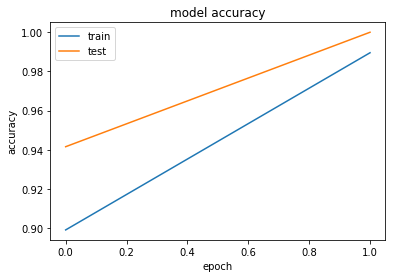

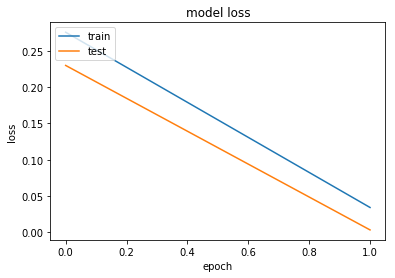

In [30]:
# list all data in history
print(trained.history.keys())
# summarize history for accuracy
plt.plot(trained.history['acc'])
plt.plot(trained.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
#
model_prediction = [np.argmax(model.predict(np.expand_dims(test_vector, 0))) for test_vector in X_test]
#model_prediction = np.array(model_prediction)
#model_prediction[np.where(model_prediction>=.5)] = 1
#model_prediction[np.where(model_prediction<.5)] = 0
#model_prediction= model_prediction.flatten()
#model_prediction = model_prediction.astype(int)
test_accuracy = 100*np.sum(model_prediction==np.argmax(Y_test,axis=1))/len(model_prediction)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 100.0000%


In [ ]:
b = [node.op.name for node in model.inputs]
print b

In [ ]:
K.get_session()


In [ ]:
K.get_session()

In [ ]:


def export_model_for_mobile(model_name, input_node_names, output_node_name):
    tf.train.write_graph(K.get_session().graph_def, 'out', \
        model_name + '_graph.pbtxt')

    tf.train.Saver().save(K.get_session(), 'out/' + model_name + '.chkp')

    freeze_graph.freeze_graph('out/' + model_name + '_graph.pbtxt', None, \
        False, 'out/' + model_name + '.chkp', output_node_name, \
        "save/restore_all", "save/Const:0", \
        'out/frozen_' + model_name + '.pb', True, "")

    input_graph_def = tf.GraphDef()
    
    output_graph_def = optimize_for_inference_lib.optimize_for_inference(
            input_graph_def, input_node_names, [output_node_name],
            tf.float32.as_datatype_enum)

    with tf.gfile.Open('out/frozen_' + model_name + '.pb', "rb") as f:
        input_graph_def.ParseFromString(f.read())

    with tf.gfile.FastGFile('out/tensorflow_lite_' + model_name + '.pb', "wb") as f:
        f.write(output_graph_def.SerializeToString())
        

        
export_model_for_mobile("stroke_prediction", ["input_input"], "output/Softmax")

In [ ]:
from google.protobuf import text_format

gd = K.get_session().graph_def

for node in gd.node:
    if node.op == "Switch":
        print(node)
        node.op = "Identity"
        del node.input[1]

#tf.train.write_graph(gd, "out/", "fixed_model.pb")

(1354, 3)
(27, 10, 50)
(27, 10, 50, 1)
[ 161  289  447  490  680  842  967 1071 1227]


/Users/shafidayatar/anaconda/envs/python2.7-DA/lib/python2.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
/Users/shafidayatar/anaconda/envs/python2.7-DA/lib/python2.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


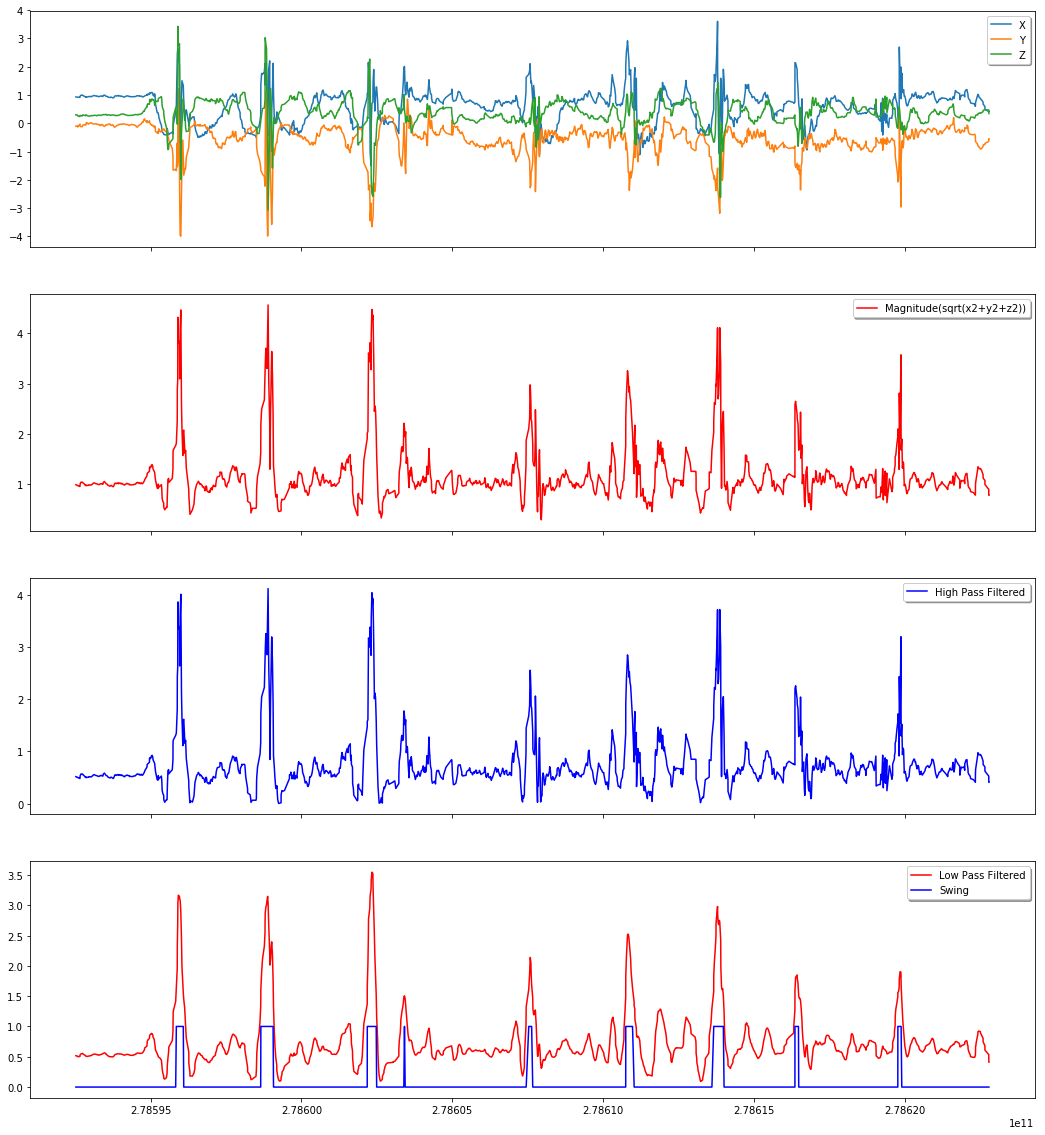

In [39]:
file_name = "temp_data/" + "test_dhruvi_set3_4_fht_2_bht_1_bhs.csv"
test_file = pd.read_csv(file_name, sep=',',header=0);
#test_file.head()
test_time = test_file['timestamp']
test_acc = test_file[['AccX','AccY', 'AccZ']]
test_gyr = test_file[['GyroX', 'GyroY', 'GyroZ']]
test_quat = test_file[['orientation_w', 'orientation_x', 'orientation_y', 'orientation_z']]
print test_acc.shape
swing_test = []
for i in range(0, test_acc.shape[0]-50, 50):
    a = test_acc[i:i+50].as_matrix().T
    g = test_gyr[i:i+50].as_matrix().T
    q = test_quat[i:i+50].as_matrix().T 
    a = np.concatenate((a,g), axis=0)
    a = np.concatenate((a,q), axis=0)
    swing_test.append(a)

swing_test = np.array(swing_test)

print swing_test.shape
swing_test = np.expand_dims(swing_test,4)
print swing_test.shape  

#(809, 10) -> [(50, 10),...]

testSwing = StrokeDetection.identifyStroke(test_time, test_acc, threshold=1.5)
#time, accleration, threshold =1, hpCutOff=.001, \
#        lpCutOff=5.0, sampleFrequecy = 50, number_of_pass = 1, axis=1, plot=True

MidIndex, x,y,z = StrokeDetection.strokeIndexes(testSwing)
print (MidIndex)
live_Test = []
for i in MidIndex: 
    a = test_acc[i-25:i+25].as_matrix().T
    g = test_gyr[i-25:i+25].as_matrix().T
    q = test_quat[i-25:i+25].as_matrix().T 
    a = np.concatenate((a,g), axis=0)
    a = np.concatenate((a,q), axis=0)
    live_Test.append(a)
    
live_Test = np.expand_dims(np.array(live_Test),4)
    



In [40]:
grip_type = ["backhand-topspin", "forehand-topspin", "no-swing", "forehand-slice", "backhand-slice"]
model_prediction = np.array([np.argmax(model.predict(np.expand_dims(test_vector, 0))) for test_vector in live_Test])
print ([SwingClasses[n] for n in model_prediction])

['forehand_slice', 'forehand_slice', 'forehand-topspin', 'backhand_topspin', 'backhand_topspin', 'backhand_topspin', 'forehand_slice', 'backhand_topspin', 'backhand_topspin']
